# Recipe Reviews and user feedback
Dataset Information

The "Recipe Reviews and User Feedback Dataset" is a comprehensive repository of data encompassing various aspects of recipe reviews and user interactions. It includes essential information such as the recipe name, its ranking on the top 100 recipes list, a unique recipe code, and user details like user ID, user name, and an internal user reputation score. Each review comment is uniquely identified with a comment ID and comes with additional attributes, including the creation timestamp, reply count, and the number of up-votes and down-votes received. Users' sentiment towards recipes is quantified on a 1 to 5 star rating scale, with a score of 0 denoting an absence of rating. This dataset is a valuable resource for researchers and data scientists, facilitating endeavors in sentiment analysis, user behavior analysis, recipe recommendation systems, and more. It offers a window into the dynamics of recipe reviews and user feedback within the culinary website domain.

Additional Variable Information
1. recipe name: {name of the recipe the comment was posted on}
2. recipe number: {placement of the recipe on the top 100 recipes list}
3. recipe code: {unique id of the recipe used by the site}
4. comment id: {unique id of the comment}
5. user id: {unique id of the user who left the comment}
6. user name: {name of the user}
7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}
8. create at: {time at which the comment was posted as a Unix timestamp}
9. reply count: {number of replies to the comment}
10. thumbs up: {number of up-votes the comment has received}
11. thumbs down: {number of down-votes the comment has received}
12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}
13. best score: {score of the comment, likely used by the site the help determine the order in the comments that appear in}
14. text: {the text content of the comment}

### Importing Packages

In [81]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

### Loading Dataset

In [3]:
df = pd.read_csv('Recipe Reviews and user Feedback Dataset.csv')
df.head()

,sr_no,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


### Information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sr_no            18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


### Describing Dataset

In [5]:
df.describe()

,sr_no,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


### Checking for N-Unique Values

In [6]:
df.nunique()

sr_no                725
recipe_number        100
recipe_code          100
recipe_name          100
comment_id         18182
user_id            13812
user_name          13586
user_reputation       22
created_at          2695
reply_count            4
thumbs_up             62
thumbs_down           58
stars                  6
best_score           588
text               17731
dtype: int64

### Checking for the NaN Values

In [7]:
df.isnull().sum()

sr_no              0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

### Splitting into Features & Label

In [8]:
df_features = df.drop(['sr_no','recipe_name','comment_id','user_id','created_at','stars'],axis=1)
df_label = df[['stars']]

### Information about Features

In [9]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    18182 non-null  int64 
 1   recipe_code      18182 non-null  int64 
 2   user_name        18182 non-null  object
 3   user_reputation  18182 non-null  int64 
 4   reply_count      18182 non-null  int64 
 5   thumbs_up        18182 non-null  int64 
 6   thumbs_down      18182 non-null  int64 
 7   best_score       18182 non-null  int64 
 8   text             18180 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.2+ MB


### Information about label

In [10]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   stars   18182 non-null  int64
dtypes: int64(1)
memory usage: 142.2 KB


### Checking for N-Unique vlaues in Label

In [11]:
df_label.nunique()

stars    6
dtype: int64

In [12]:
df_label.value_counts()

stars
5        13829
0         1696
4         1655
3          490
1          280
2          232
dtype: int64

### Checking for the correlations

C:\Users\Dhrumil Patel\AppData\Local\Temp\ipykernel_4404\2055794981.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


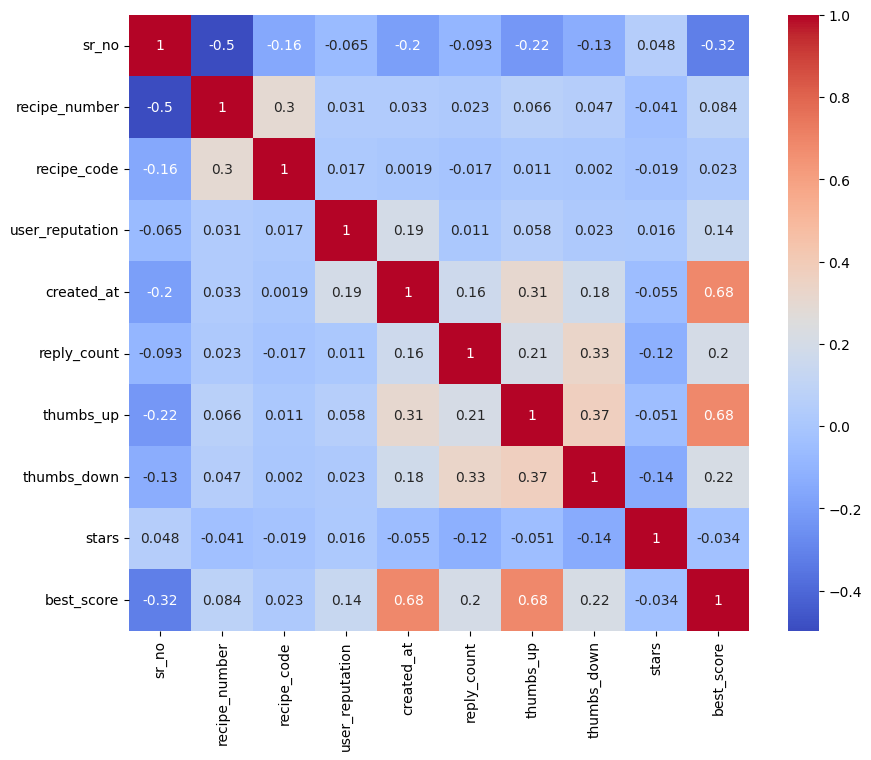

In [13]:
plt.figure(figsize=(10,8))
df_corr = df.corr()
df_corr_plot = sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

In [14]:
df_corr = df.corr()
df_stars_corr = df_corr['stars'].sort_values(ascending=False)
print(df_stars_corr)

stars              1.000000
sr_no              0.048456
user_reputation    0.015554
recipe_code       -0.019204
best_score        -0.034263
recipe_number     -0.040779
thumbs_up         -0.050884
created_at        -0.055212
reply_count       -0.119693
thumbs_down       -0.142555
Name: stars, dtype: float64


C:\Users\Dhrumil Patel\AppData\Local\Temp\ipykernel_4404\214996950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


### Plotting Stars Vs Best Score

<AxesSubplot: xlabel='stars', ylabel='best_score'>

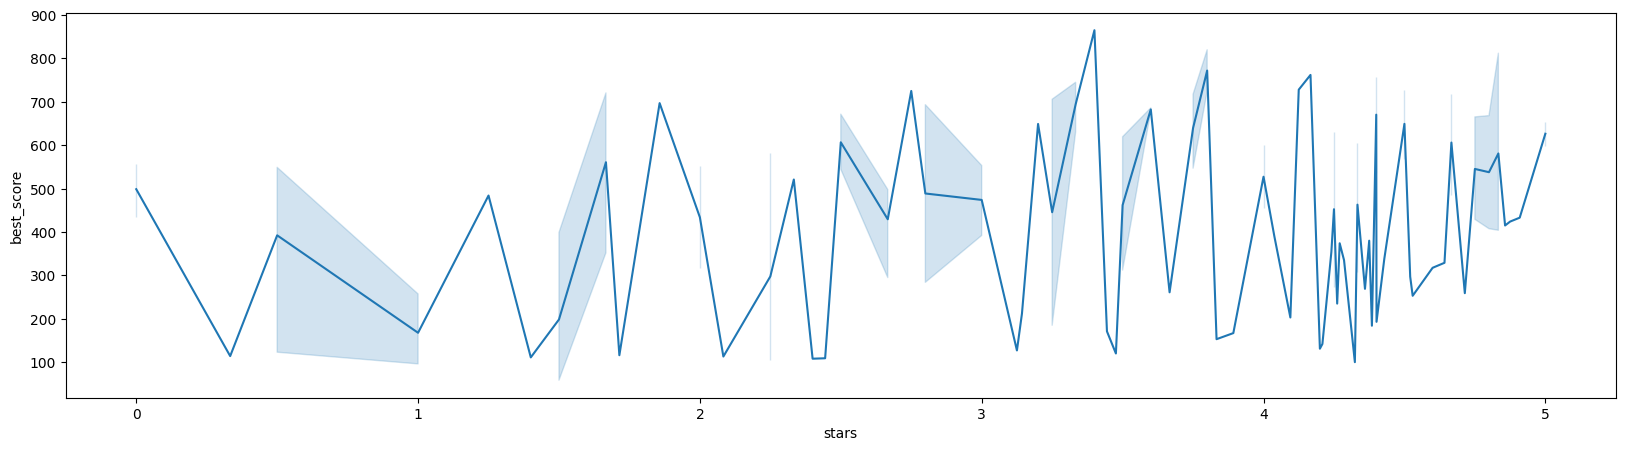

In [15]:
plt.figure(figsize=(20,5))
avg_best_score_by_stars = df.groupby('best_score')['stars'].mean().reset_index()
avg_stars_by_best_score = avg_best_score_by_stars.sort_values(by='best_score',ascending=False)
sns.lineplot(data=avg_stars_by_best_score,x='stars',y='best_score')

### Plotting Recipe Number Vs Stars

<AxesSubplot: xlabel='recipe_number', ylabel='stars'>

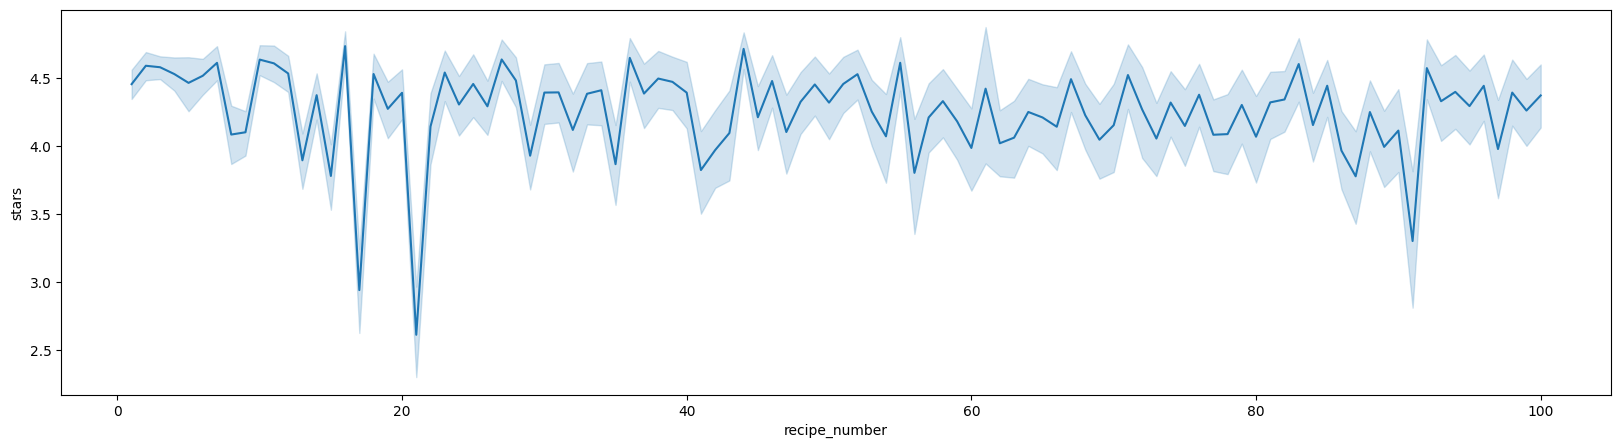

In [16]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x='recipe_number',y='stars')

### Checking for the categorical columns

In [17]:
df_categorical = df_features.select_dtypes('object')
df_categorical.columns

Index(['user_name', 'text'], dtype='object')

## Data Pre-Processing
- Performing Encoding
- Feature Extraction (TF-IDF Vectorization) 
- Checking for the outliers
- Removing Outliers (if applicable)
- Standardize the data
- SMOTE - Synthetic Minority Oversampling Technique
- Train Test Split

### Performing Encoding

In [18]:
encoder = OrdinalEncoder()
df_features['user_name'] = encoder.fit_transform(df_features[['user_name']])
type(df_features)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe_number    18182 non-null  int64  
 1   recipe_code      18182 non-null  int64  
 2   user_name        18182 non-null  float64
 3   user_reputation  18182 non-null  int64  
 4   reply_count      18182 non-null  int64  
 5   thumbs_up        18182 non-null  int64  
 6   thumbs_down      18182 non-null  int64  
 7   best_score       18182 non-null  int64  
 8   text             18180 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ MB


### Feature Extraction (TF-IDF Vectorization)

In [19]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove usernames
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters (including emojis)
    return text

df_features = df_features.dropna(subset=['text'])
df_features['cleaned_text'] = df_features['text'].apply(clean_text)
vectorizer = TfidfVectorizer(stop_words='english',max_features=2000)
text_encoded = vectorizer.fit_transform(df_features['cleaned_text']).toarray()
df_features['text_encoded'] = text_encoded.tolist()

In [20]:
df_features = df_features.drop(['text','cleaned_text'],axis=1)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18180 entries, 0 to 18181
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe_number    18180 non-null  int64  
 1   recipe_code      18180 non-null  int64  
 2   user_name        18180 non-null  float64
 3   user_reputation  18180 non-null  int64  
 4   reply_count      18180 non-null  int64  
 5   thumbs_up        18180 non-null  int64  
 6   thumbs_down      18180 non-null  int64  
 7   best_score       18180 non-null  int64  
 8   text_encoded     18180 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 1.4+ MB


### Checking for an outliers

Remvoing outliers are not applicable

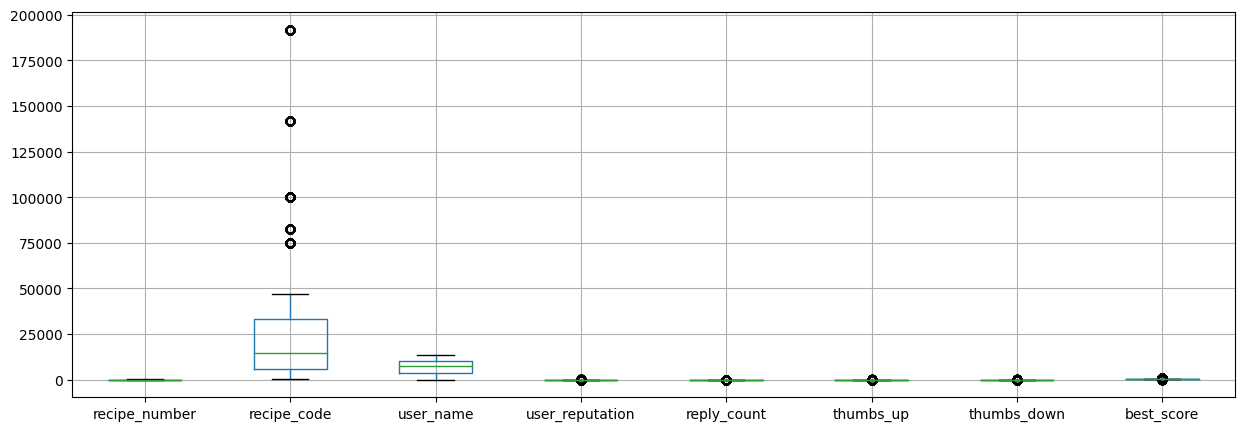

In [21]:
plt.figure(figsize=(15,5))
df_features.boxplot()
plt.show()

### Standardize the data

In [22]:
scaler = StandardScaler()
text_encoded_flat = np.vstack(df_features['text_encoded'])
df_features_scaled = df_features.copy()
numeric_columns = df_features.columns.difference(['text_encoded'])
df_features_scaled[numeric_columns] = scaler.fit_transform(df_features_scaled[numeric_columns])
df_features['text_encoded'] = scaler.fit_transform(text_encoded_flat)
df_features_scaled = pd.concat([df_features_scaled[numeric_columns],df_features['text_encoded']],axis=1)
df_features_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18180 entries, 0 to 18181
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   best_score       18180 non-null  float64
 1   recipe_code      18180 non-null  float64
 2   recipe_number    18180 non-null  float64
 3   reply_count      18180 non-null  float64
 4   thumbs_down      18180 non-null  float64
 5   thumbs_up        18180 non-null  float64
 6   user_name        18180 non-null  float64
 7   user_reputation  18180 non-null  float64
 8   text_encoded     18180 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### SMOTE - Synthetic Minority Oversampling Technique

In [57]:
sampler = RandomOverSampler()
X_resampled, y_resampled = sampler.fit_resample(X=df_features_scaled,y=df_label)
print(X_resampled.shape,y_resampled.shape)
print(y_resampled.value_counts())

(82962, 9) (82962, 1)
stars
0        13827
1        13827
2        13827
3        13827
4        13827
5        13827
dtype: int64


### Train Test Split

In [58]:
df_label = df_label.iloc[:df_features_scaled.shape[0]]
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(66369, 9) (16593, 9)
(66369, 1) (16593, 1)


## Model Building
- Model selection 
- Model Evaluation
    - Cross Val Score
    - Cross Val Predict 
    - Confusion Matrix
    - Precision, Recall & F1 score
- Model Hyperparameter Tuning
- Model fitting on Test set

### Model Selection

In [ ]:
svc_clf = SVC()
forest_clf = RandomForestClassifier(n_estimators=150)
tree_clf = DecisionTreeClassifier()
logistic_clf = LogisticRegression()

### Model Evaluation

### Cross Validation Score

In [60]:
svc_clf_acc = cross_val_score(estimator=svc_clf,X=X_train,y=y_train,scoring='accuracy',cv=3)
forest_clf_acc = cross_val_score(estimator=forest_clf,X=X_train,y=y_train,scoring='accuracy',cv=3)
tree_clf_acc = cross_val_score(estimator=tree_clf,X=X_train,y=y_train,scoring='accuracy',cv=3)
logistic_clf_acc = cross_val_score(estimator=logistic_clf,X=X_train,y=y_train,scoring='accuracy',cv=3)
print(svc_clf_acc)
print(forest_clf_acc)
print(tree_clf_acc)
print(logistic_clf_acc)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

[0.3539755  0.35817927 0.36464313]
[0.9454414  0.94236767 0.94535099]
[0.93929395 0.93897753 0.93861592]
[0.21362383 0.20833522 0.21086652]


### Cross Validation Predict

In [61]:
svc_clf_pred = cross_val_predict(estimator=svc_clf,X=X_train,y=y_train,cv=3)
forest_clf_pred = cross_val_predict(estimator=forest_clf,X=X_train,y=y_train,cv=3)
tree_clf_pred = cross_val_predict(estimator=tree_clf,X=X_train,y=y_train,cv=3)
logistic_clf_pred = cross_val_predict(estimator=logistic_clf,X=X_train,y=y_train,cv=3)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

### Confustion Matrix - SVC

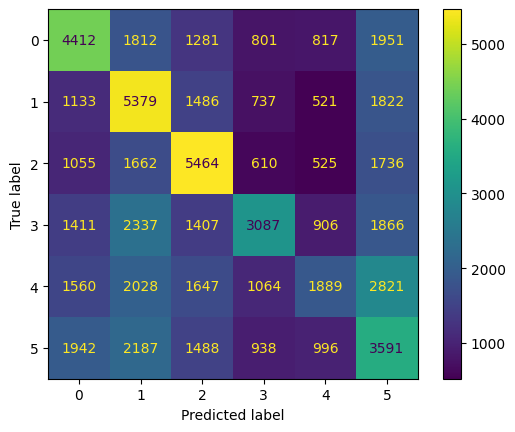

In [62]:
svc_conf_mat = confusion_matrix(y_true=y_train,y_pred=svc_clf_pred)
svc_conf_mat_plot = ConfusionMatrixDisplay(confusion_matrix=svc_conf_mat).plot()
plt.show()

### Confusion Matrix - Random Forest

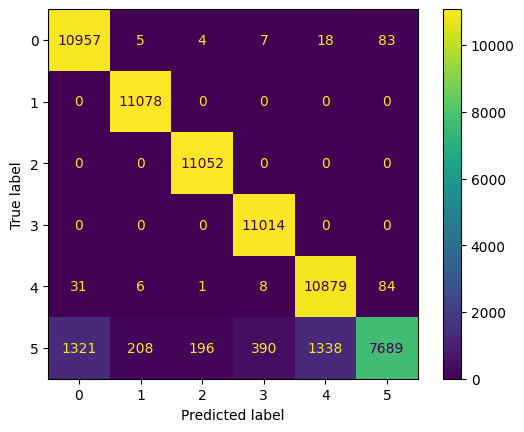

In [63]:
forest_conf_mat = confusion_matrix(y_true=y_train,y_pred=forest_clf_pred)
forest_conf_mat_plot = ConfusionMatrixDisplay(confusion_matrix=forest_conf_mat).plot()
plt.show()

### Confusion Matrix - Decision Tree

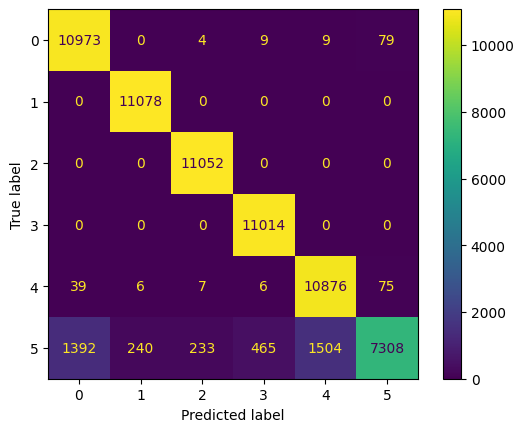

In [64]:
tree_conf_mat = confusion_matrix(y_true=y_train,y_pred=tree_clf_pred)
tree_conf_mat_plot = ConfusionMatrixDisplay(confusion_matrix=tree_conf_mat).plot()
plt.show()

### Confusion Matrix - Logistic Regression

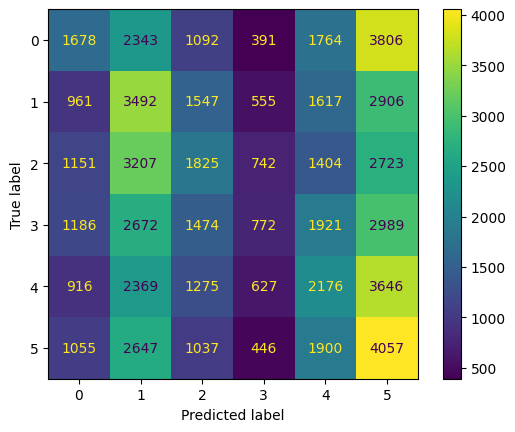

In [65]:
logistic_conf_mat = confusion_matrix(y_true=y_train,y_pred=logistic_clf_pred)
logistic_conf_mat_plot = ConfusionMatrixDisplay(confusion_matrix=logistic_conf_mat).plot()
plt.show()

### Precision, Recall, F1 Scoring - SVC 

In [69]:
precision = precision_score(y_true=y_train,y_pred=svc_clf_pred,average='weighted')
recall = recall_score(y_true=y_train,y_pred=svc_clf_pred,average='weighted')
f1 = f1_score(y_true=y_train,y_pred=svc_clf_pred,average='weighted')
print([precision,recall,f1])

[0.3633922907771198, 0.3589326342117555, 0.35148336743694103]


### Precision, Recall, F1 Scoring - Random Forest

In [70]:
precision = precision_score(y_true=y_train,y_pred=forest_clf_pred,average='weighted')
recall = recall_score(y_true=y_train,y_pred=forest_clf_pred,average='weighted')
f1 = f1_score(y_true=y_train,y_pred=forest_clf_pred,average='weighted')
print([precision,recall,f1])

[0.9476242634047517, 0.9442510810770088, 0.9407938712576142]


### Precision, Recall, F1 Scoring - Decision Tree

In [71]:
precision = precision_score(y_true=y_train,y_pred=tree_clf_pred,average='weighted')
recall = recall_score(y_true=y_train,y_pred=tree_clf_pred,average='weighted')
f1 = f1_score(y_true=y_train,y_pred=tree_clf_pred,average='weighted')
print([precision,recall,f1])

[0.9428751513016752, 0.9387063237354789, 0.9342661014747541]


### Precision, Recall, F1 Scoring - Logistic Regression

In [72]:
precision = precision_score(y_true=y_train,y_pred=logistic_clf_pred,average='weighted')
recall = recall_score(y_true=y_train,y_pred=logistic_clf_pred,average='weighted')
f1 = f1_score(y_true=y_train,y_pred=logistic_clf_pred,average='weighted')
print([precision,recall,f1])

[0.21555769662309104, 0.21094185538429086, 0.19878822970116103]


### Model Hyperparameter Tuning

In [73]:
param_grid = [
    {'n_estimators':[50,100,150,200],'max_features':['sqrt','log2']}
]
grid_search = GridSearchCV(estimator=forest_clf,param_grid=param_grid,cv=3)
grid_search.fit(X_train,y_train)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=150),
             param_grid=[{'max_features': ['sqrt', 'log2'],
                          'n_estimators': [50, 100, 150, 200]}])

### GridSearch Results

In [75]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)

cv_res = grid_search.cv_results_
for score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(score,params)

0.944356552004701
RandomForestClassifier(max_features='log2')
0.9429552953939339 {'max_features': 'sqrt', 'n_estimators': 50}
0.944055206497009 {'max_features': 'sqrt', 'n_estimators': 100}
0.9440702737723937 {'max_features': 'sqrt', 'n_estimators': 150}
0.9440401392216246 {'max_features': 'sqrt', 'n_estimators': 200}
0.9433621118293178 {'max_features': 'log2', 'n_estimators': 50}
0.944356552004701 {'max_features': 'log2', 'n_estimators': 100}
0.9440100046708554 {'max_features': 'log2', 'n_estimators': 150}
0.9443113501785473 {'max_features': 'log2', 'n_estimators': 200}


### Model Fitting on Test set

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2753
           1       0.98      1.00      0.99      2749
           2       0.99      1.00      1.00      2775
           3       0.98      1.00      0.99      2813
           4       0.92      0.99      0.96      2818
           5       1.00      0.78      0.88      2685

    accuracy                           0.96     16593
   macro avg       0.97      0.96      0.96     16593
weighted avg       0.97      0.96      0.96     16593



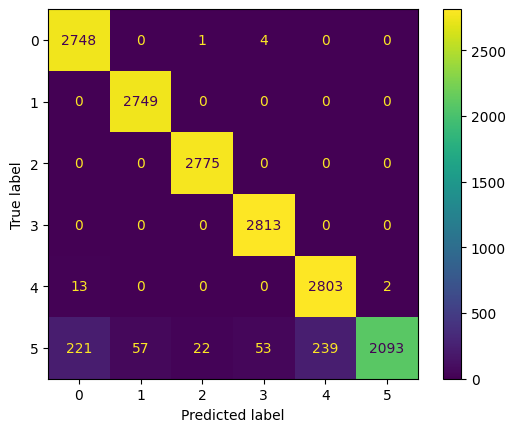

In [79]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
final_model_conf_mat = confusion_matrix(y_true=y_test,y_pred=y_pred)
final_model_conf_mat_plot = ConfusionMatrixDisplay(confusion_matrix=final_model_conf_mat).plot()
plt.show()

### `NOTE:` Recipe Reviews and user feedback end to end Machine learning project has done, visit more at: www.github.com/itechdp